# Preprocessing

## Twitter data preprocesing

In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("../input_data/data.csv", names=cols)
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df['pre_clean_len'] = [len(t) for t in df.text]

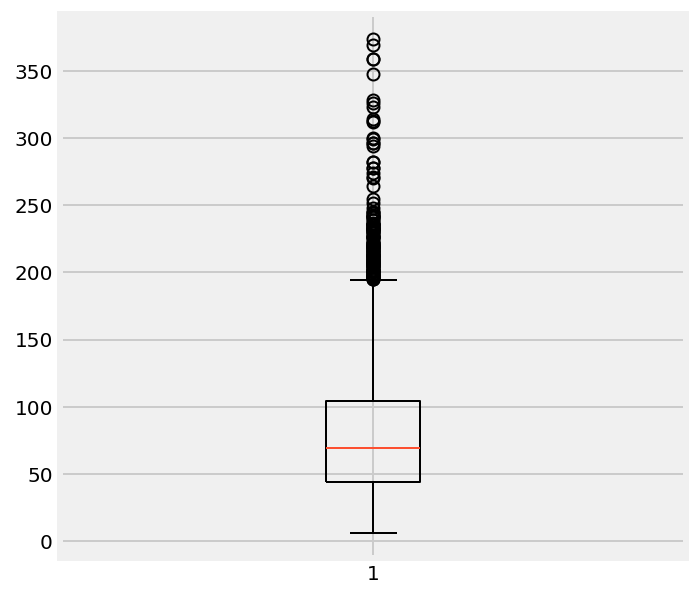

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
sentiment        1600000 non-null int64
id               1600000 non-null int64
date             1600000 non-null object
query_string     1600000 non-null object
user             1600000 non-null object
text             1600000 non-null object
pre_clean_len    1600000 non-null int64
dtypes: int64(3), object(4)
memory usage: 85.4+ MB


In [6]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [7]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [8]:
df[df.sentiment == 0].head(10)

,sentiment,text,pre_clean_len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111
5,0,@Kwesidei not the whole crew,29
6,0,Need a hug,11
7,0,@LOLTrish hey long time no see! Yes.. Rains a...,99
8,0,@Tatiana_K nope they didn't have it,36
9,0,@twittera que me muera ?,25


In [9]:
df[df.sentiment == 4].head(10)

,sentiment,text,pre_clean_len
800000,4,I LOVE @Health4UandPets u guys r the best!!,44
800001,4,im meeting up with one of my besties tonight! ...,72
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S...",137
800003,4,Being sick can be really cheap when it hurts t...,104
800004,4,@LovesBrooklyn2 he has that effect on everyone,47
800005,4,@ProductOfFear You can tell him that I just bu...,133
800006,4,@r_keith_hill Thans for your response. Ihad al...,69
800007,4,"@KeepinUpWKris I am so jealous, hope you had a...",114
800008,4,"@tommcfly ah, congrats mr fletcher for finally...",63
800009,4,@e4VoIP I RESPONDED Stupid cat is helping me ...,67


In [9]:
from porter_stemmer import PorterStemmer
from bs4 import BeautifulSoup
import re
import string
from sklearn.feature_extraction import stop_words

negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
print re

def processTweet(tweet):
    # decode HTML special entities (e.g. &amp;)
    soup = BeautifulSoup(tweet, 'lxml')
    tweet = soup.get_text()
#     print tweet
    #remove @username
    tweet = re.sub('@[^\s]+','',tweet)
#     print tweet
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
#     print tweet
    # To lowercase
    tweet = tweet.lower()
#     print tweet
    # Remove hyperlinks starting with http*
    tweet = re.sub(r'https?:\/\/.*\/\w*','', tweet)
#     print tweet
    # Remove hyperlinks starting with www.?*
    tweet = re.sub(r'www.[^ ]+','', tweet)
#     print tweet
    # changing negation statement with "'s" to proper format. 
    tweet = neg_pattern.sub(lambda x: negations_dic[x.group()], tweet)
#     print tweet
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
#     print tweet
    # remove non ascii
    tweet = re.sub(r'[^\x00-\x7F]',' ', tweet)
#     print tweet
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', tweet)
#     print tweet
    # remove anything that is not alphanumeric
    tweet = re.sub('[\W_]+', ' ', tweet)
#     print tweet
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
#     print tweet
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
#     print tweet
    tweet = re.sub(' +', ' ',tweet)
#     print tweet
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ')  
#     print tweet
    # Removing Stopwords from tweet using sklearn.feature_extraction
#     split_list = tweet.split(" ")
#     tweet = [ word for word in split_list if word not in stop_words.ENGLISH_STOP_WORDS ]
#     print tweet
    # Stemming the 
    ps = PorterStemmer()
    tweet = tweet.split(" ")
    tweet = [ ps.stem(word) for word in tweet ] 
#     print tweet
    tweet = ' '.join(tweet)
#     print tweet
    return tweet

<module 're' from '/usr/lib/python2.7/re.pyc'>


In [11]:
print "Cleaning and parsing the tweets...\n"
processed_data = list()
i = 0
for index, row in df.iterrows():
    if( (i+1)%10000 == 0 ):
        print "Tweets %d of %d has been processed" % ( i+1, df.shape[0])
    i += 1
    processed_data.append(processTweet(row['text']))

Cleaning and parsing the tweets...

Tweets 10000 of 1600000 has been processed
Tweets 20000 of 1600000 has been processed
Tweets 30000 of 1600000 has been processed
Tweets 40000 of 1600000 has been processed
Tweets 50000 of 1600000 has been processed
Tweets 60000 of 1600000 has been processed
Tweets 70000 of 1600000 has been processed
Tweets 80000 of 1600000 has been processed
Tweets 90000 of 1600000 has been processed
Tweets 100000 of 1600000 has been processed
Tweets 110000 of 1600000 has been processed
Tweets 120000 of 1600000 has been processed
Tweets 130000 of 1600000 has been processed
Tweets 140000 of 1600000 has been processed
Tweets 150000 of 1600000 has been processed
Tweets 160000 of 1600000 has been processed
Tweets 170000 of 1600000 has been processed
Tweets 180000 of 1600000 has been processed
Tweets 190000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 210000 of 1600000 has been processed
Tweets 220000 of 1600000 has been processed
Tweet

In [12]:
df['processed'] = [i.encode('utf-8') for i in processed_data]
df.head()

,sentiment,text,pre_clean_len,processed
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,awww that bummer you shoulda got david carr th...
1,0,is upset that he can't update his Facebook by ...,111,upset that can not updat hi facebook tex and m...
2,0,@Kenichan I dived many times for the ball. Man...,89,dive mani time for the ball manag save the res...
3,0,my whole body feels itchy and like its on fire,47,whole bodi feel itchi and like it fire
4,0,"@nationwideclass no, it's not behaving at all....",111,not behav all mad why here becaus can not see ...


In [13]:
clean_df = pd.DataFrame(processed_data,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.to_csv('../input_data/clean_tweet.csv',encoding='utf-8')

In [14]:
csv = '../input_data/clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

/home/rushit/.local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,text,target
0,awww that bummer you shoulda got david carr th...,0
1,upset that can not updat hi facebook tex and m...,0
2,dive mani time for the ball manag save the res...,0
3,whole bodi feel itchi and like it fire,0
4,not behav all mad why here becaus can not see ...,0


In [15]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1594465 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


In [16]:
my_df[my_df.isnull().any(axis=1)].head()

,text,target
191,NaN,0
208,NaN,0
249,NaN,0
282,NaN,0
398,NaN,0


In [17]:
np.sum(my_df.isnull().any(axis=1))

5535

In [18]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594465 entries, 0 to 1594464
Data columns (total 2 columns):
text      1594465 non-null object
target    1594465 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.3+ MB


In [19]:
my_df.to_csv('../input_data/clean_tweet_without_NaN.csv',encoding='utf-8',index=False)

## Preprocessing Facebook data

In [32]:
fb_df = pd.read_csv("../input_data/facebook_comments/fb_data.csv")
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 2 columns):
label    720 non-null int64
post     720 non-null object
dtypes: int64(1), object(1)
memory usage: 11.3+ KB


In [33]:
fb_df.head()

,label,post
0,0,Why is Barnes and Nobles version of the Kindle...
1,4,"@Maria: Do you mean the Nook? Be careful, bo..."
2,4,kindle is awesome! mines great\r\n
3,4,I love mine!!!!\r\n
4,0,Meh. I think Singles are a bad idea. Big name ...


In [34]:
fb_df['pre_clean_len'] = [len(t) for t in fb_df.post]

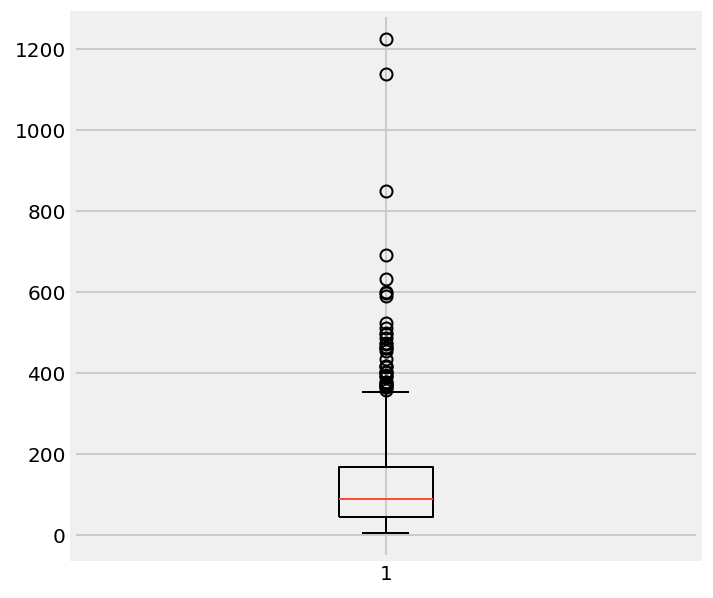

In [35]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(fb_df.pre_clean_len)
plt.show()

In [36]:
print "Cleaning and parsing the Facebook posts...\n"
fb_processed_data = list()

for index, row in fb_df.iterrows():
    fb_processed_data.append(processTweet(row['post']))
print "Done"

Cleaning and parsing the Facebook posts...

Done


In [38]:
fb_clean_df = pd.DataFrame(fb_processed_data,columns=['text'])
fb_clean_df['target'] = fb_df.label
fb_clean_df.to_csv('../input_data/clean_fb.csv',encoding='utf-8',index=False)

# Preprocessing Amazon reviews

In [3]:
am_df = pd.read_csv("../input_data/amazon_review/amazon_data.csv")
am_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
label    129 non-null int64
post     129 non-null object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [4]:
am_df.head()

,label,post
0,4,canon 30d and 40d are way sexier might upgrade...
1,0,i though about upgrating to a different camera...
2,0,i didnt see the need to go up to the xti nikon...
3,4,other canon cameras i own include the canon eo...
4,4,to 40d right before 50d was announced thanks a...


In [5]:
am_df['pre_clean_len'] = [len(t) for t in am_df.post]

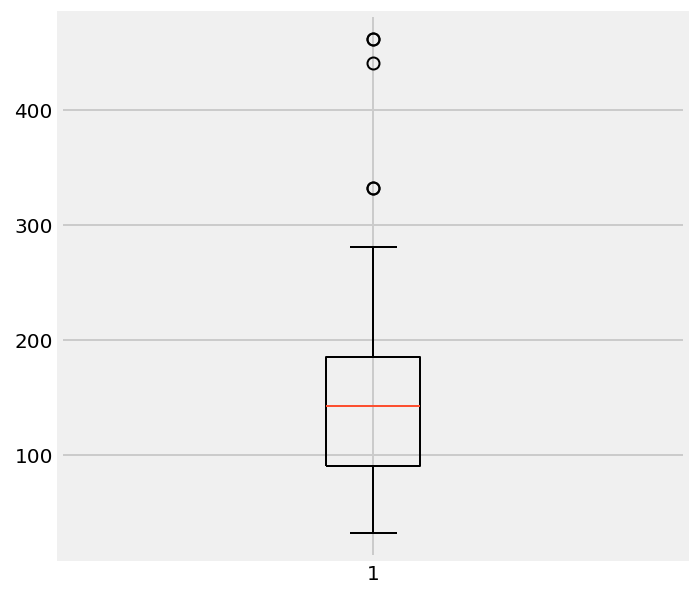

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(am_df.pre_clean_len)
plt.show()

In [10]:
print "Cleaning and parsing the Amazon reviews...\n"
am_processed_data = list()

for index, row in am_df.iterrows():
    am_processed_data.append(processTweet(row['post']))
print "Done"

Cleaning and parsing the Amazon reviews...

Done


In [11]:
am_clean_df = pd.DataFrame(am_processed_data,columns=['text'])
am_clean_df['target'] = am_df.label
am_clean_df.to_csv('../input_data/clean_amazon.csv',encoding='utf-8',index=False)